In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import os

In [2]:
files=os.listdir(r"G:\Dataset\Uber")[-7:]
files.remove("uber-raw-data-janjune-15.csv")

In [3]:
path=r"G:\Dataset\Uber"

df=pd.DataFrame()
for file in files:

    f=pd.read_csv(path+"/"+file,encoding="utf-8")
    df=pd.concat([df,f])


In [4]:
df.shape

(4534327, 4)

In [5]:
df=df.head(2000000)
df.rename(columns={'Date/Time':'Date_Time'},inplace=True)
df["Date_Time"]=pd.to_datetime(df["Date_Time"],format = "%m/%d/%Y %H:%M:%S")
df["weekday"]=df.Date_Time.dt.day_name()
df["month"]=df.Date_Time.dt.month
df["month_name"]=df.Date_Time.dt.month_name()
df["year"]=df.Date_Time.dt.year
df["minute"]=df.Date_Time.dt.minute
df['hour']=df.Date_Time.dt.hour
df["day"]=df.Date_Time.dt.day

In [6]:
df.head(5)

,Date_Time,Lat,Lon,Base,weekday,month,month_name,year,minute,hour,day
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,4,April,2014,11,0,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,4,April,2014,17,0,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,4,April,2014,21,0,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,4,April,2014,28,0,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,4,April,2014,33,0,1


In [7]:
#for colors in graph
def color_list_func(n):
    from colormap import rgb2hex
    import random
    cl=[]
    for i in range(n):
        r=random.randint(0,255)
        g=random.randint(0,255)
        b=random.randint(0,255)
        cl.append(rgb2hex(r,g,b))
    return cl

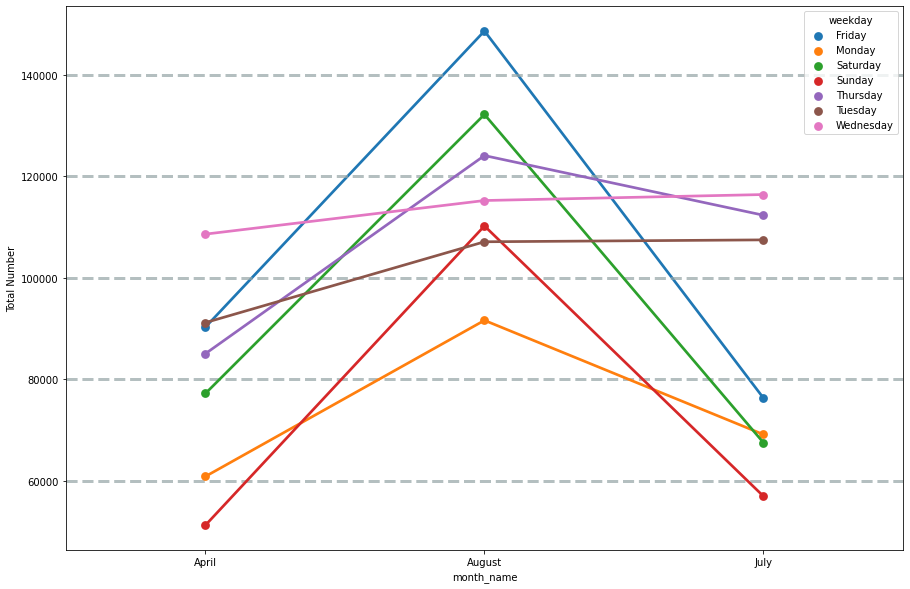

In [8]:
month1=df.groupby(["month_name","weekday"])["Date_Time"].count().reset_index()
month1.rename({"Date_Time":"count"},inplace=True)
plt.figure(figsize=(15,10))
sns.pointplot(x="month_name",y="Date_Time",data=month1,hue="weekday")
plt.ylabel("Total Number")
plt.grid(color='#95a5a6', linestyle='--', linewidth=3, axis='y',alpha=0.7)
plt.savefig('month_name_weekday.png')

In [16]:
plt.figure(figsize=(20,15))
fig1=px.bar(df,
    x=df.weekday.value_counts().index,
    y=df.weekday.value_counts(),
    title="Journey by Weekdays",
    color=df.weekday.unique()
    # color=color_list_func(7)
)
fig1.update_layout(xaxis_title="Weekday",yaxis_title="Number of journey")


<Figure size 1440x1080 with 0 Axes>

In [18]:
plt.figure(figsize=(20,15))
fig2=px.bar(
    x=df.hour.value_counts().index,
    y=df.hour.value_counts(),
    title="Journey by Hour",
    color=df.hour.unique()
)
fig2.update_layout(xaxis_title="Hour",yaxis_title="Number of journey")


<Figure size 1440x1080 with 0 Axes>

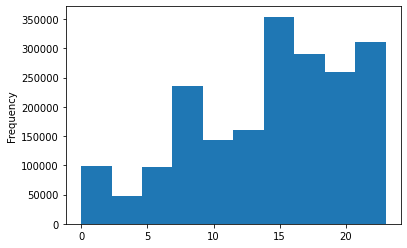

In [20]:
df.hour.plot(kind='hist')
plt.savefig('hour_hist.png')

In [22]:
plt.figure(figsize=(20,15))
fig3=px.pie(data_frame=df,
        values=df.groupby("month_name")["hour"].count(),
        hover_name=df.groupby("month_name")["hour"].count().index,
         color_discrete_sequence=px.colors.sequential.Rainbow_r,
        names=df.month_name.unique(),
        title="Month vise hourly journey",
        #labels={"value":"Hour"}
        
    
)
fig3.update_traces( 
                  marker=dict( line=dict(color='#000000', width=2)))


<Figure size 1440x1080 with 0 Axes>

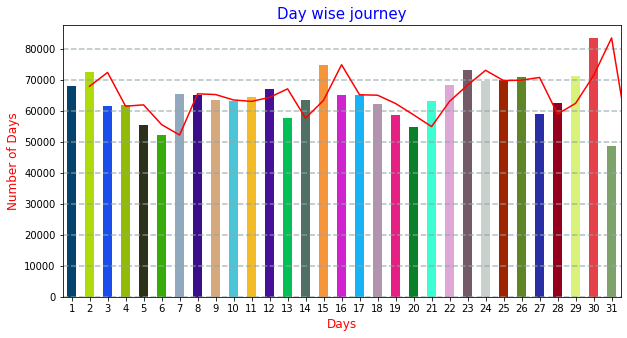

<Figure size 432x288 with 0 Axes>

In [23]:
plt.figure(figsize=(10,5))
df.day.value_counts(sort=False).plot(kind="bar",
                                    color=color_list_func(31)
                                        )
plt.title("Day wise journey",fontsize="15",color="Blue")
plt.xlabel("Days",fontsize="12",color="red")
plt.ylabel("Number of Days",fontsize="12",color="red")
df.day.value_counts(sort=False).plot(kind="line",color="red")
plt.grid(color='#95a5a6', linestyle='--', linewidth=1.5, axis='y',alpha=0.7)
plt.show()
plt.savefig('day_wise_journey.png')

In [31]:
df.head(5)

,Date_Time,Lat,Lon,Base,weekday,month,month_name,year,minute,hour,day
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,4,April,2014,11,0,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,4,April,2014,17,0,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,4,April,2014,21,0,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,4,April,2014,28,0,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,4,April,2014,33,0,1


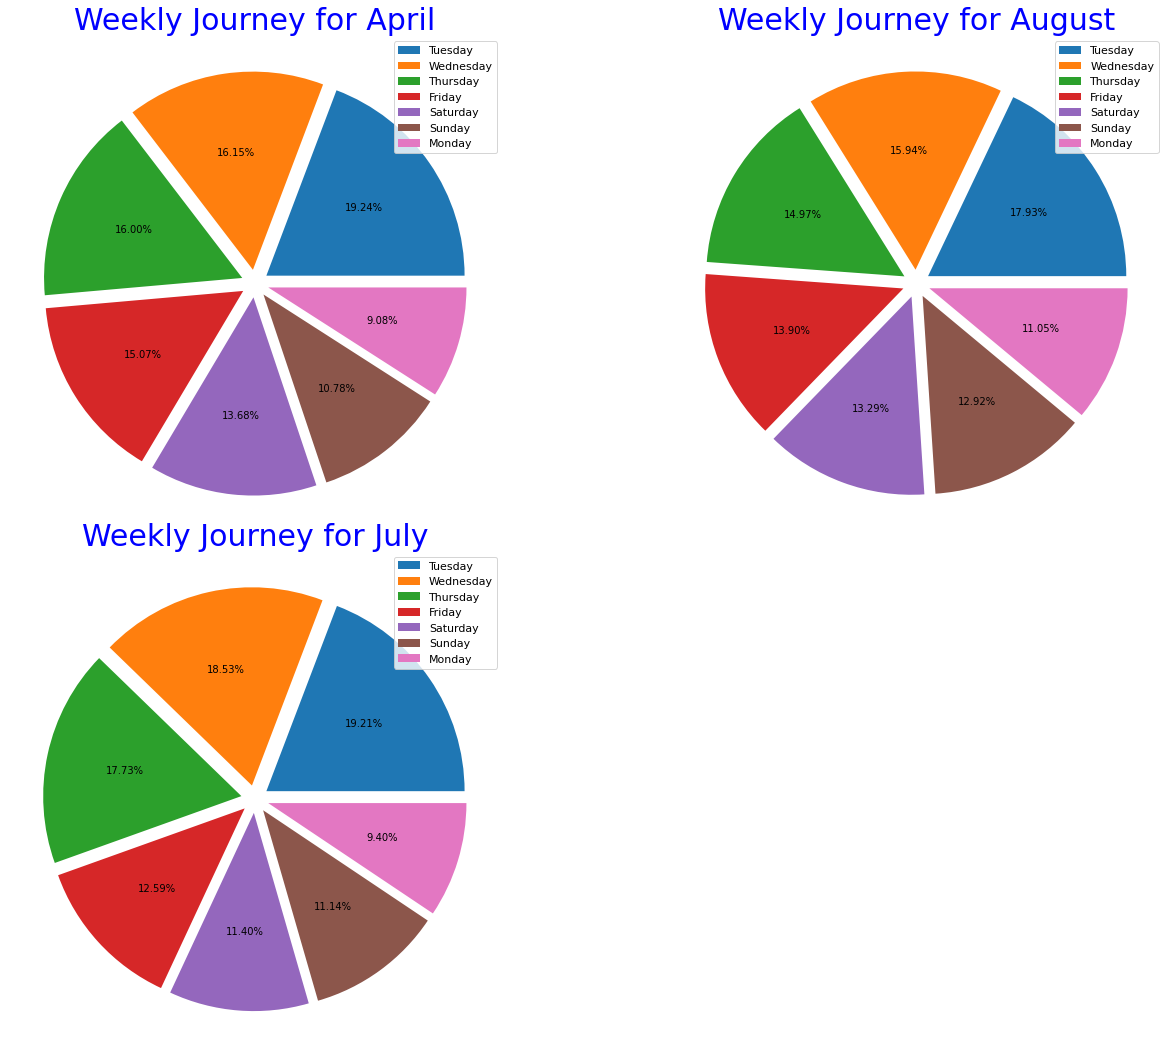

<Figure size 432x288 with 0 Axes>

In [24]:
explode_list=[0.07,0.07,0.07,0.07,0.07,0.07,0.07]
plt.figure(figsize=(20,15))
plt.legend(labels=df.weekday.unique(),loc="upper right")
for i,month in enumerate(df.month_name.unique(),1):
    
    plt.subplot(2,2,i)
    
    d=df[df.month_name==month]
    
    d["weekday"].value_counts().plot(kind="pie",
   
                                        autopct="%0.2f%%",
                                        labels=None,
                                        #pctdistance=1.1
                                        explode=explode_list

                                        )
    plt.tight_layout(pad=2)
    plt.title("Weekly Journey for "+ month,fontsize=30,color="blue")
    plt.ylabel(None)
    plt.xticks(rotation=90)
    plt.legend(labels=df.weekday.unique(),loc="upper right",fontsize=11)
plt.show()
plt.savefig('weekly journey per month.png')

   


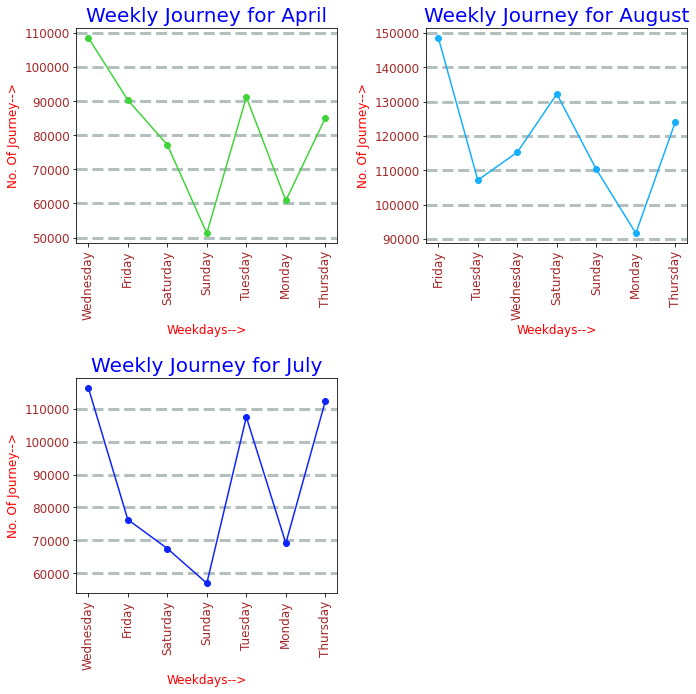

In [26]:
plt.figure(figsize=(10,10))
for i,month in enumerate(df.month_name.unique(),1):
    plt.subplot(2,2,i)
    d=df[df.month_name==month]
    plt.plot(d.weekday.value_counts(sort=False),
                                "o-",
                                color=color_list_func(1)[0]
                        )
    plt.xticks(rotation=90)
    plt.title("Weekly Journey for "+ month,fontsize=20,color="blue")
    plt.xlabel("Weekdays-->",fontsize="12",color="red")
    plt.ylabel("No. Of Journey-->",fontsize="12",color="red")
    plt.xticks(fontsize="12",color="brown")
    plt.yticks(fontsize="12",color="brown")
    plt.grid(color='#95a5a6', linestyle='--', linewidth=3, axis='y',alpha=0.7)

    plt.tight_layout(pad=2)
    plt.savefig('weekly journey for month line.png')

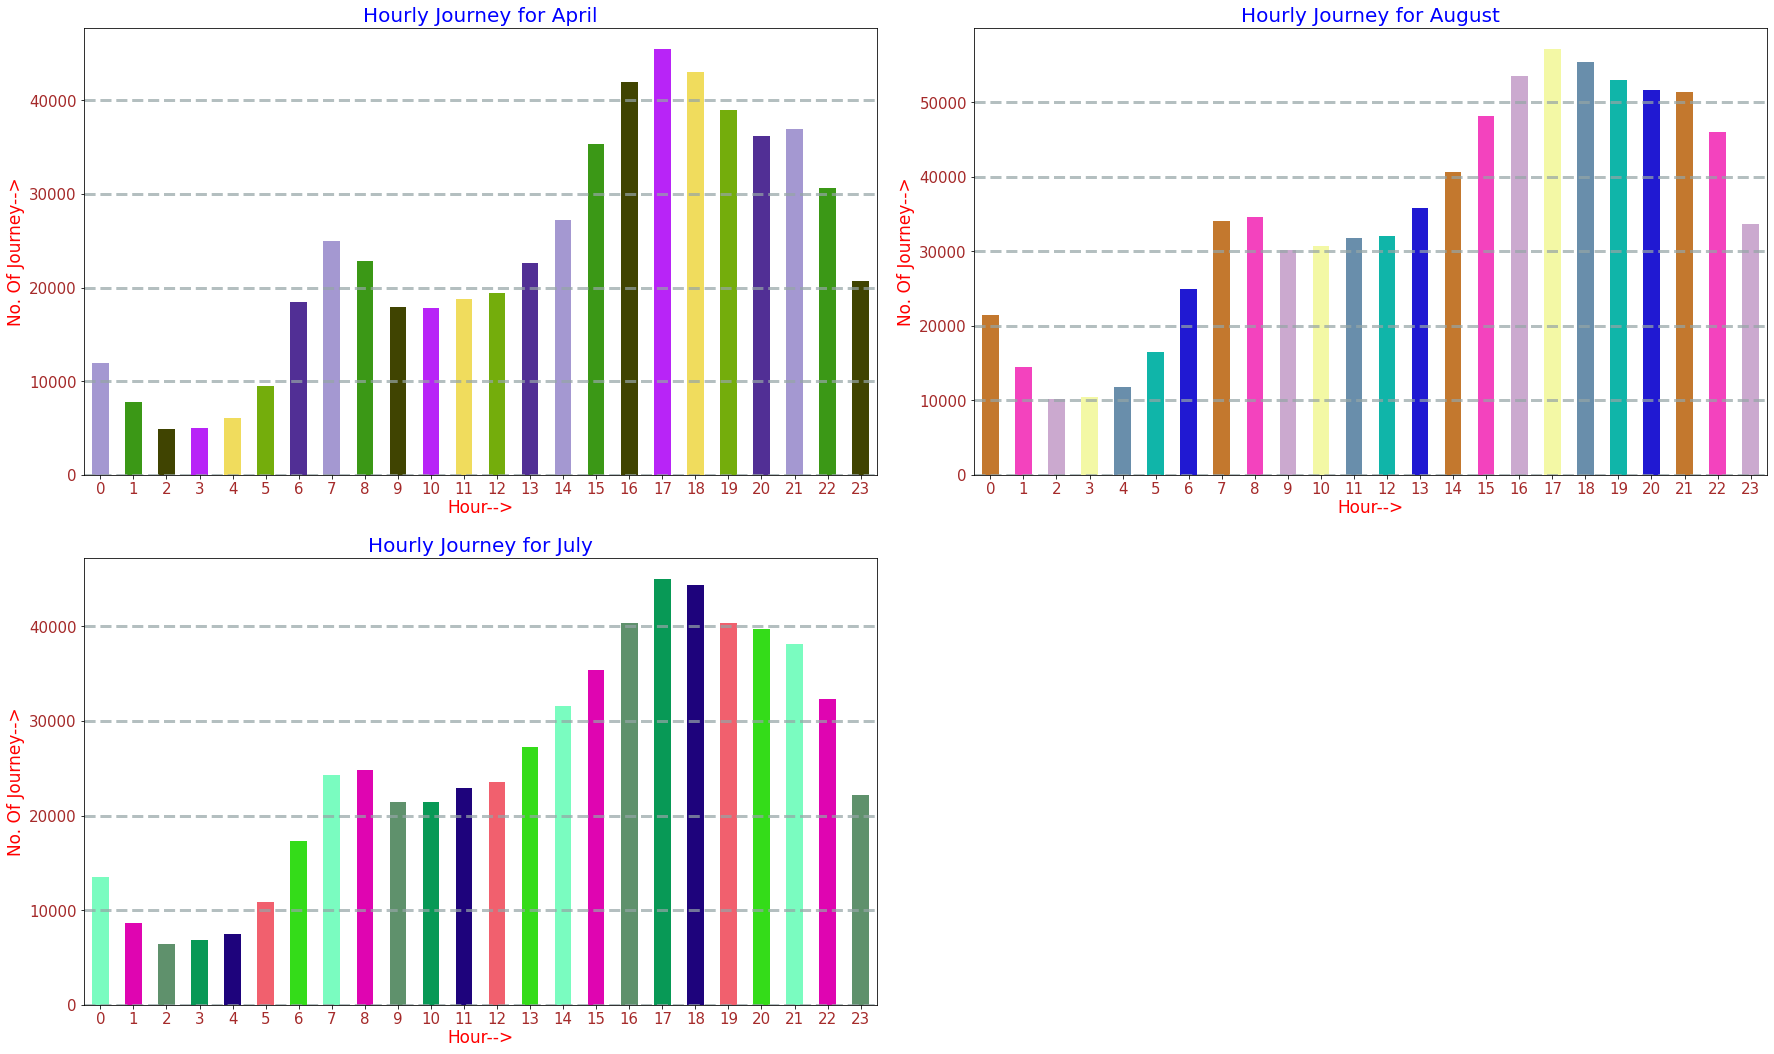

In [27]:
plt.figure(figsize=(25,15))
for i,month in enumerate(df.month_name.unique(),1):
    plt.subplot(2,2,i)
    d=df[df.month_name==month]
    d.hour.value_counts(sort=False).plot(kind="bar",
            color=color_list_func(7)
    )
    plt.xticks(rotation=0)
    plt.title("Hourly Journey for "+ month,fontsize=20,color="blue")
    plt.xlabel("Hour-->",labelpad=2,fontsize="17",color="red")
    plt.ylabel("No. Of Journey-->",fontsize="17",color="red")
    plt.xticks(fontsize="15",color="brown")
    plt.yticks(fontsize="15",color="brown")
    plt.grid(color='#95a5a6', linestyle='--', linewidth=3, axis='y', alpha=0.7)
    plt.tight_layout(pad=2)
    plt.savefig('hourly journey per month.png')

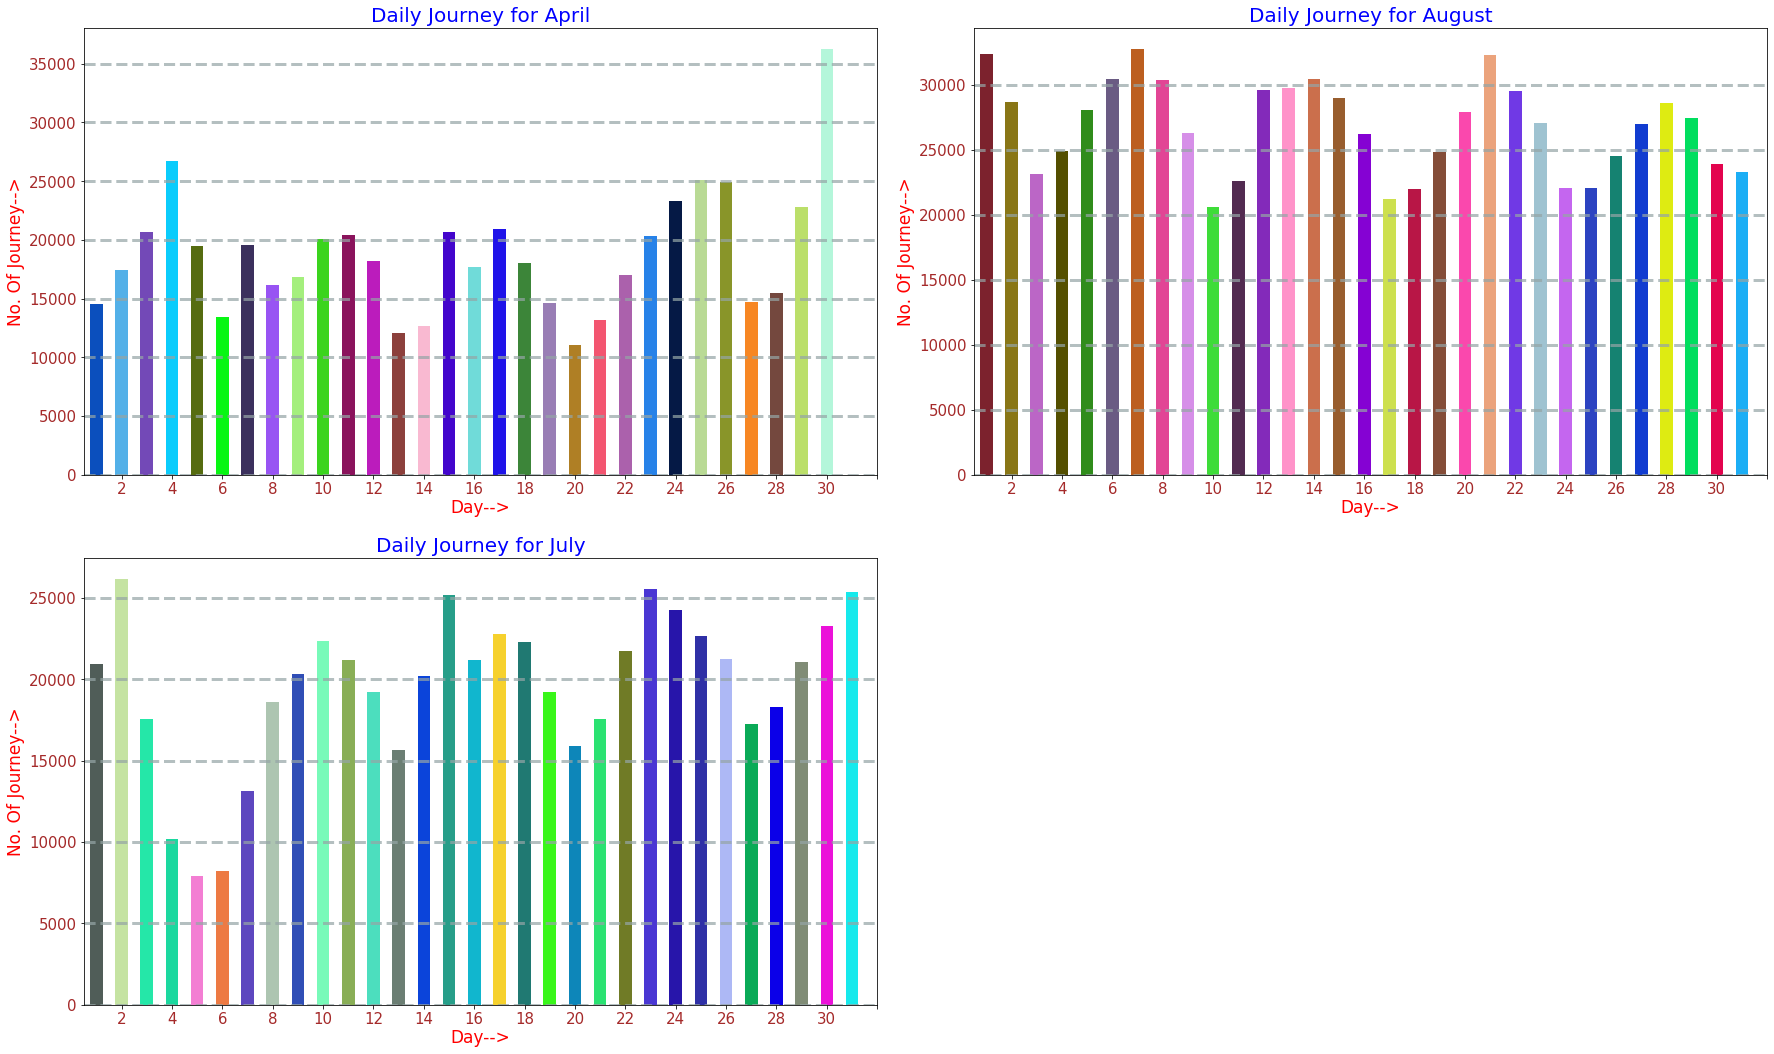

In [36]:
plt.figure(figsize=(25,15))
for i,month in enumerate(df.month_name.unique(),1):
    plt.subplot(2,2,i)
    d=df[df.month_name==month]
    d.day.value_counts(sort=False).plot(kind="bar",
            color=color_list_func(31)
    )
    plt.xticks(rotation=0)
    plt.title("Daily Journey for "+ month,fontsize=20,color="blue")
    plt.xlabel("Day-->",labelpad=2,fontsize="17",color="red")
    plt.ylabel("No. Of Journey-->",fontsize="17",color="red")
    plt.xticks([1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31],fontsize="15",color="brown")
    plt.yticks(fontsize="15",color="brown")
    plt.grid(color='#95a5a6', linestyle='--', linewidth=3, axis='y', alpha=0.7)
    plt.tight_layout(pad=2)

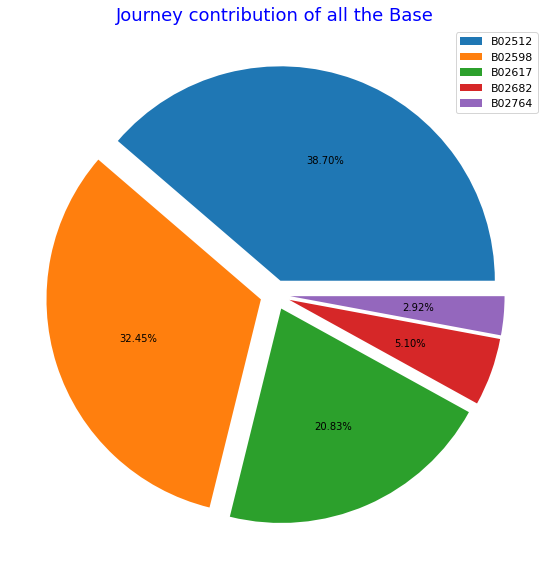

<Figure size 432x288 with 0 Axes>

In [28]:
explode_list=[0.07,0.07,0.07,0.07,0.07]
plt.figure(figsize=(15,8))
df.Base.value_counts().plot(kind="pie",
                                
                                autopct="%0.2f%%",
                                        labels=None,
                                        #pctdistance=1.1
                                        explode=explode_list

                                        )
plt.tight_layout(pad=2)
plt.title("Journey contribution of all the Base",fontsize=18,color="blue")
plt.ylabel(None)
plt.legend(labels=df.Base.unique(),loc="upper right",fontsize=11)
plt.show()
plt.savefig('Journey contribution of all the Base.png')


    



In [44]:
df.head()

,Date_Time,Lat,Lon,Base,weekday,month,month_name,year,minute,hour,day
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,4,April,2014,11,0,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,4,April,2014,17,0,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,4,April,2014,21,0,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,4,April,2014,28,0,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,4,April,2014,33,0,1


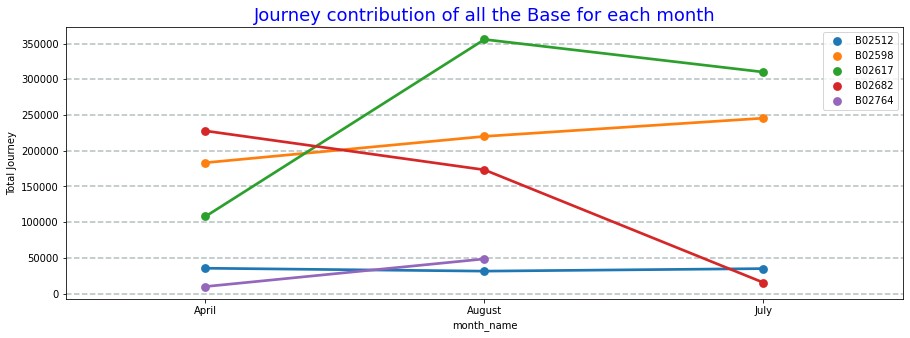

In [31]:
plt.figure(figsize=(15,5))
b=df.groupby(["Base","month_name"])["Date_Time"].count().reset_index()
sns.pointplot(x="month_name",y="Date_Time",hue="Base",data=b,err_style="bars",
ci=68)
plt.ylabel("Total Journey")
plt.title("Journey contribution of all the Base for each month",fontsize=18,color="blue")
plt.grid(color='#95a5a6', linestyle='--', linewidth=1.5, axis='y',alpha=0.7)
plt.legend(loc='upper right')
plt.savefig("Journey contribution of all the Base for each month line.png")

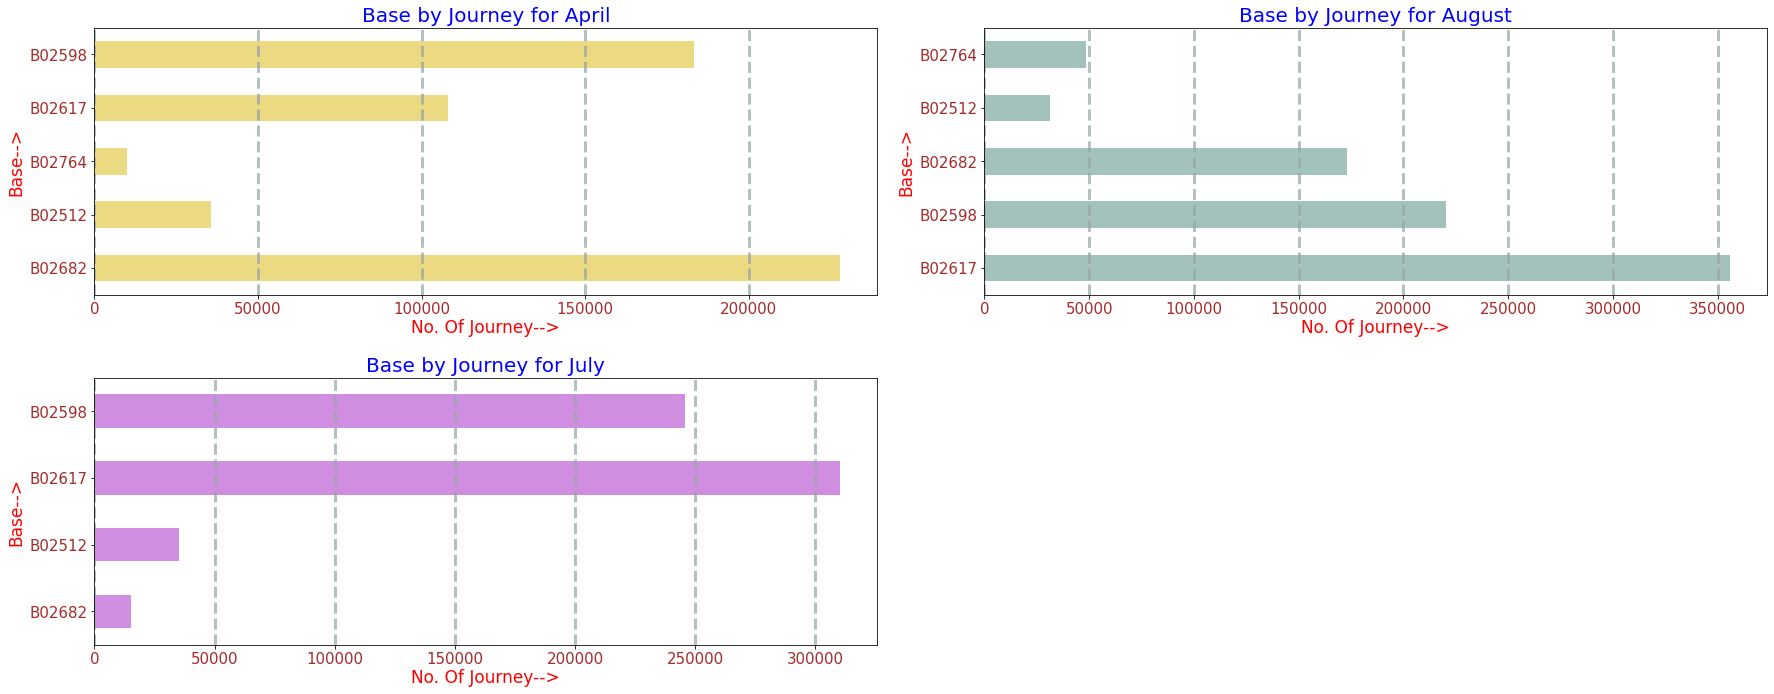

In [32]:
plt.figure(figsize=(25,10))
for i,month in enumerate(df.month_name.unique(),1):
    plt.subplot(2,2,i)
    d=df[df.month_name==month]
    d.Base.value_counts(sort=False).plot(kind="barh",
            color=color_list_func(1),
            alpha=0.6
    )
    plt.xticks(rotation=0)
    plt.title("Base by Journey for "+ month,fontsize=20,color="blue")
    plt.xlabel("No. Of Journey-->",labelpad=2,fontsize="17",color="red")
    plt.ylabel("Base-->",fontsize="17",color="red")
    plt.xticks(fontsize="15",color="brown")
    plt.yticks(fontsize="15",color="brown")
    plt.grid(color='#95a5a6', linestyle='--', linewidth=3, axis='x', alpha=0.7)
    plt.tight_layout(pad=2)
    plt.savefig("Journey contribution of all the Base for each month bar.png")

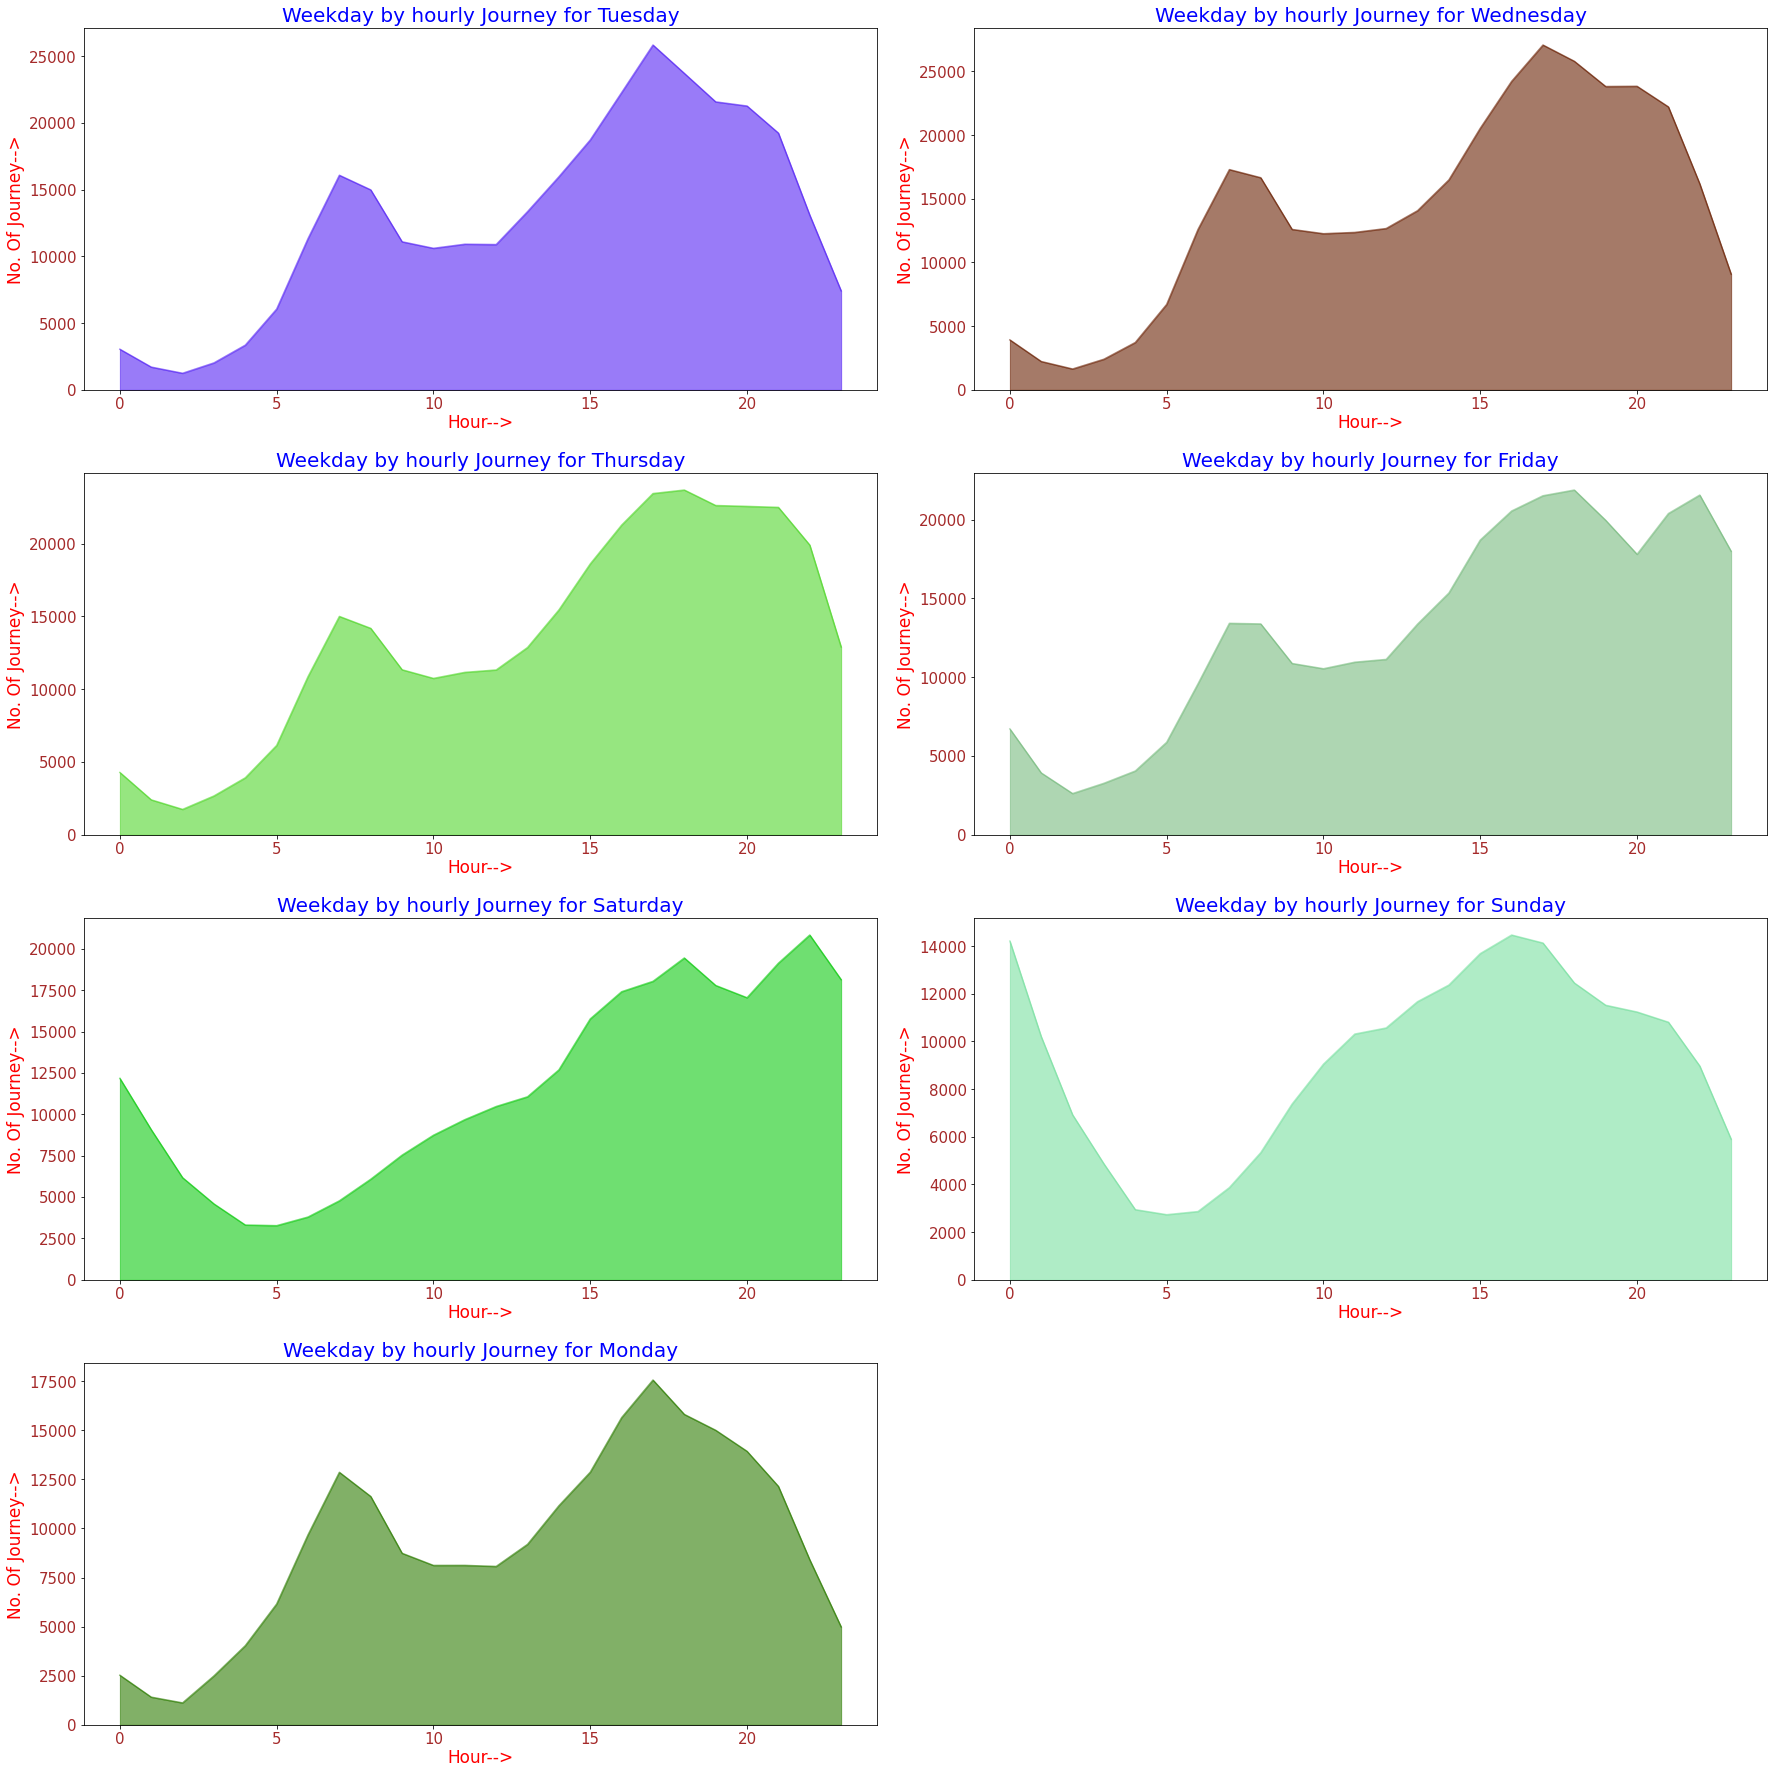

In [33]:
plt.figure(figsize=(25,25))
for i,weekday1 in enumerate(df.weekday.unique(),1):
    plt.subplot(4,2,i)
    d=df[df.weekday==weekday1]
    d.hour.value_counts(sort=False).plot(kind="area",
            color=color_list_func(1),
            alpha=0.6
    )
    plt.xticks(rotation=0)
    plt.title("Weekday by hourly Journey for "+ weekday1,fontsize=20,color="blue")
    plt.xlabel("Hour-->",labelpad=2,fontsize="17",color="red")
    plt.ylabel("No. Of Journey-->",fontsize="17",color="red")
    plt.xticks(fontsize="15",color="brown")
    plt.yticks(fontsize="15",color="brown")    
    plt.tight_layout(pad=2)
    plt.savefig("Journey contribution of weekday for each hour.png")

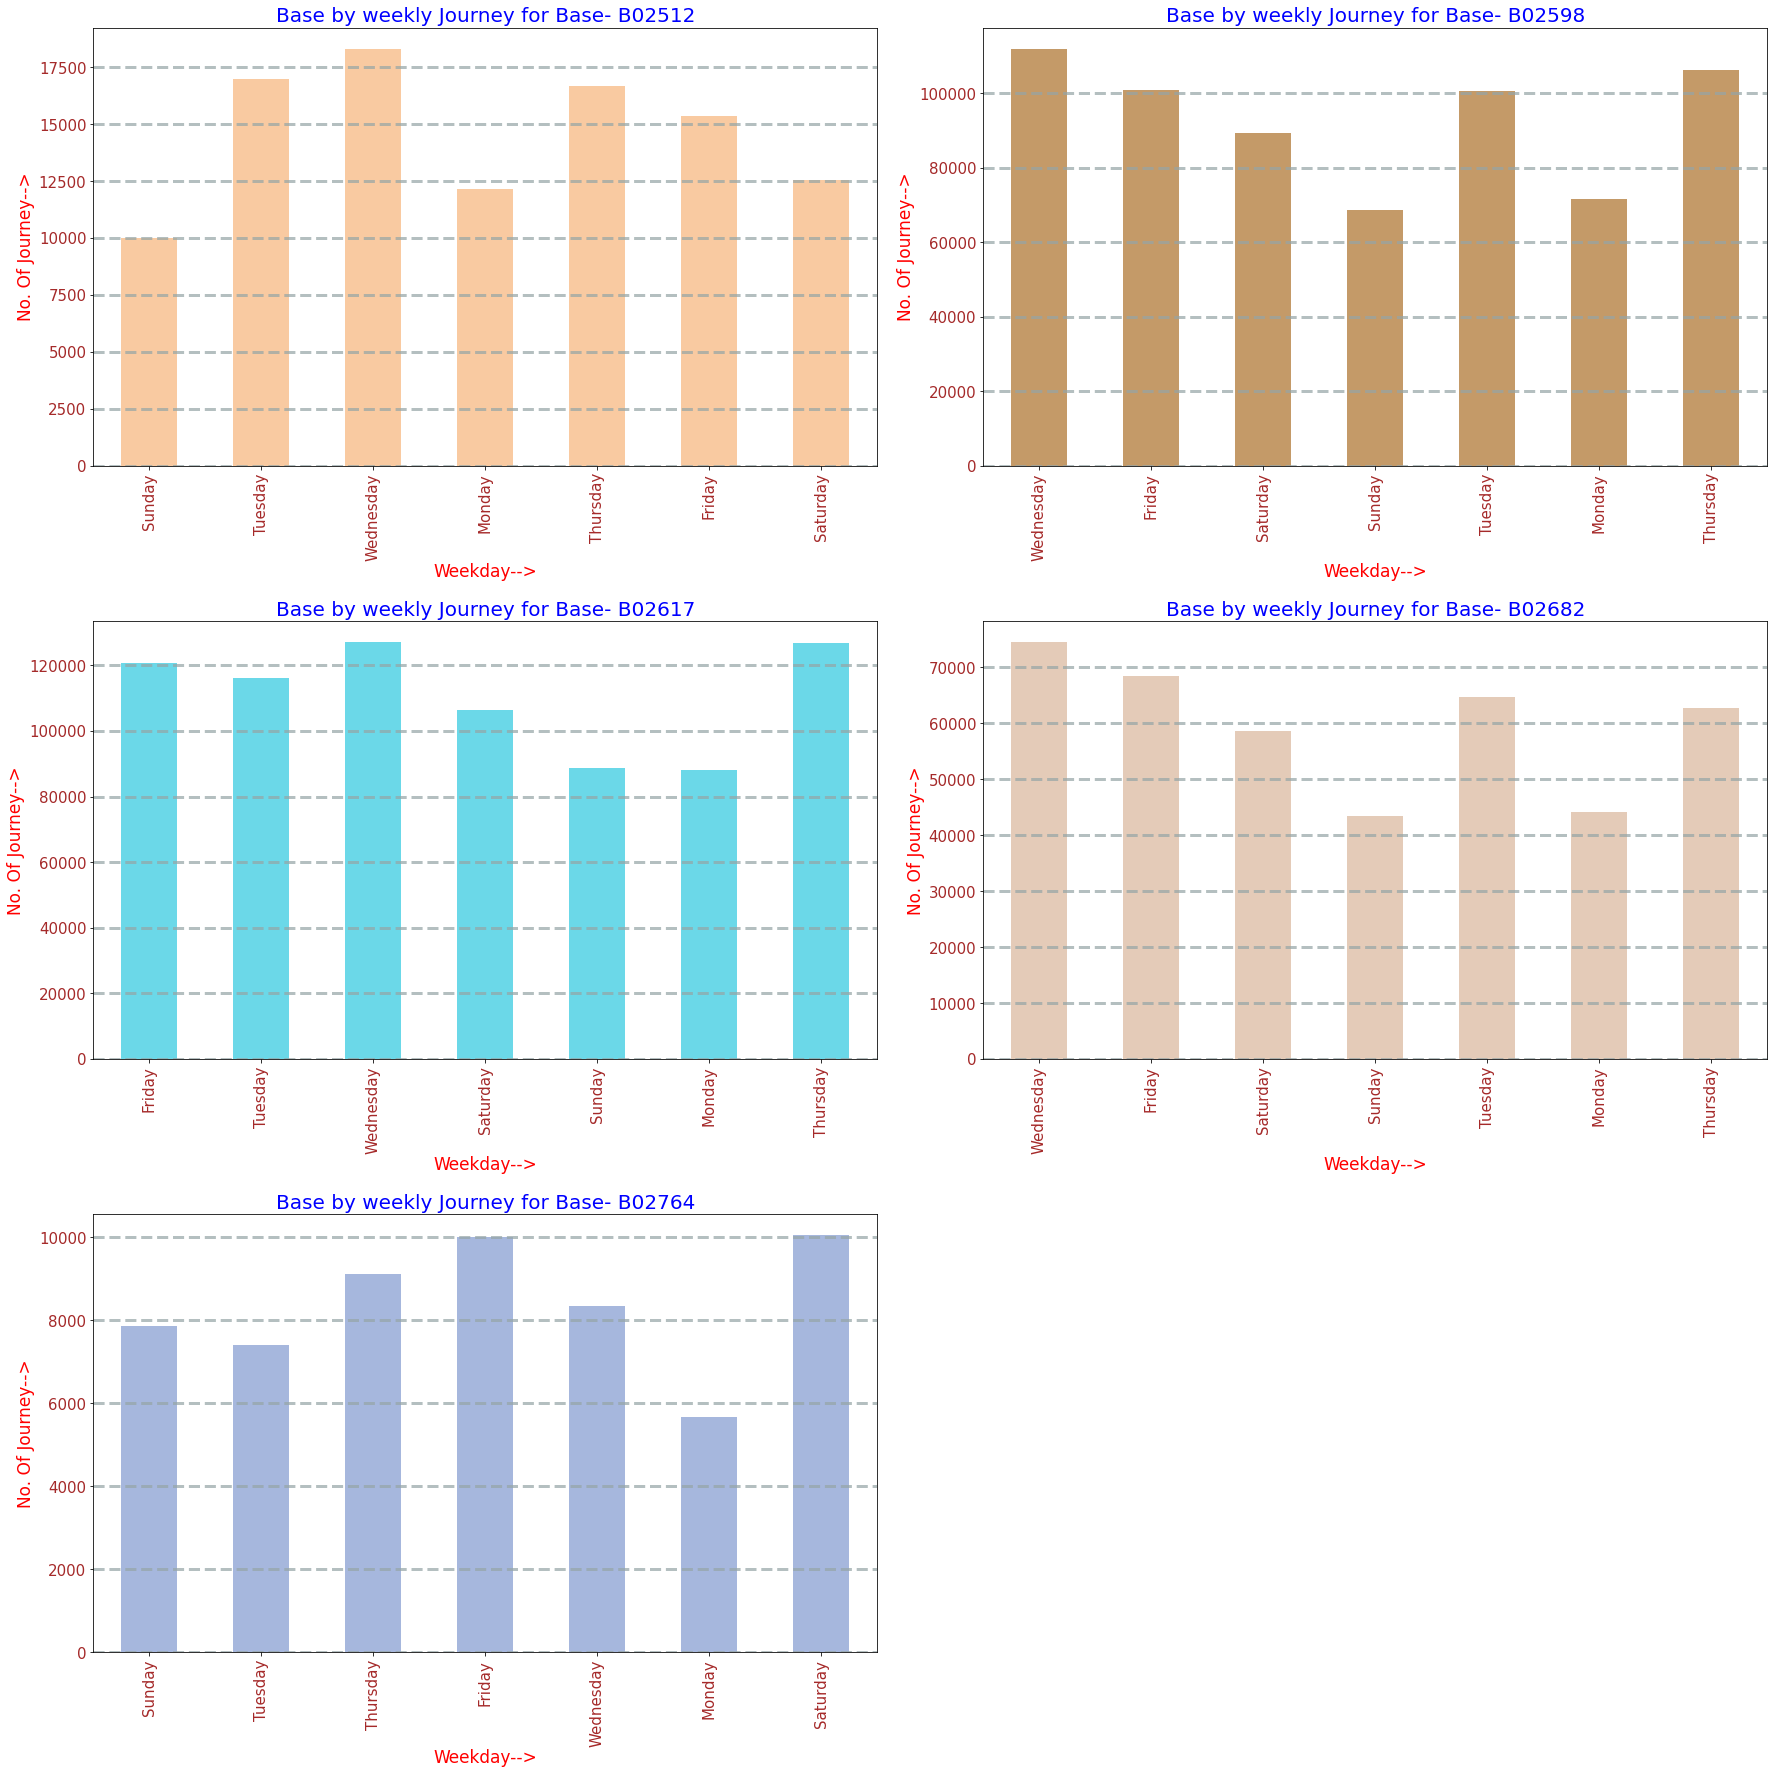

In [34]:
plt.figure(figsize=(25,25))
for i,Base1 in enumerate(df.Base.unique(),1):
    plt.subplot(3,2,i)
    d=df[df.Base==Base1]
    d.weekday.value_counts(sort=False).plot(kind="bar",
            color=color_list_func(1),
            alpha=0.6
    )

    plt.title("Base by weekly Journey for Base- "+ Base1,fontsize=20,color="blue")
    plt.xlabel("Weekday-->",labelpad=2,fontsize="17",color="red")
    plt.ylabel("No. Of Journey-->",fontsize="17",color="red")
    plt.xticks(fontsize="15",color="brown")
    plt.yticks(fontsize="15",color="brown")
    plt.grid(color='#95a5a6', linestyle='--', linewidth=3, axis='y', alpha=0.7)
    plt.tight_layout(pad=2)
    plt.savefig("Journey contribution of base by weekday.png")

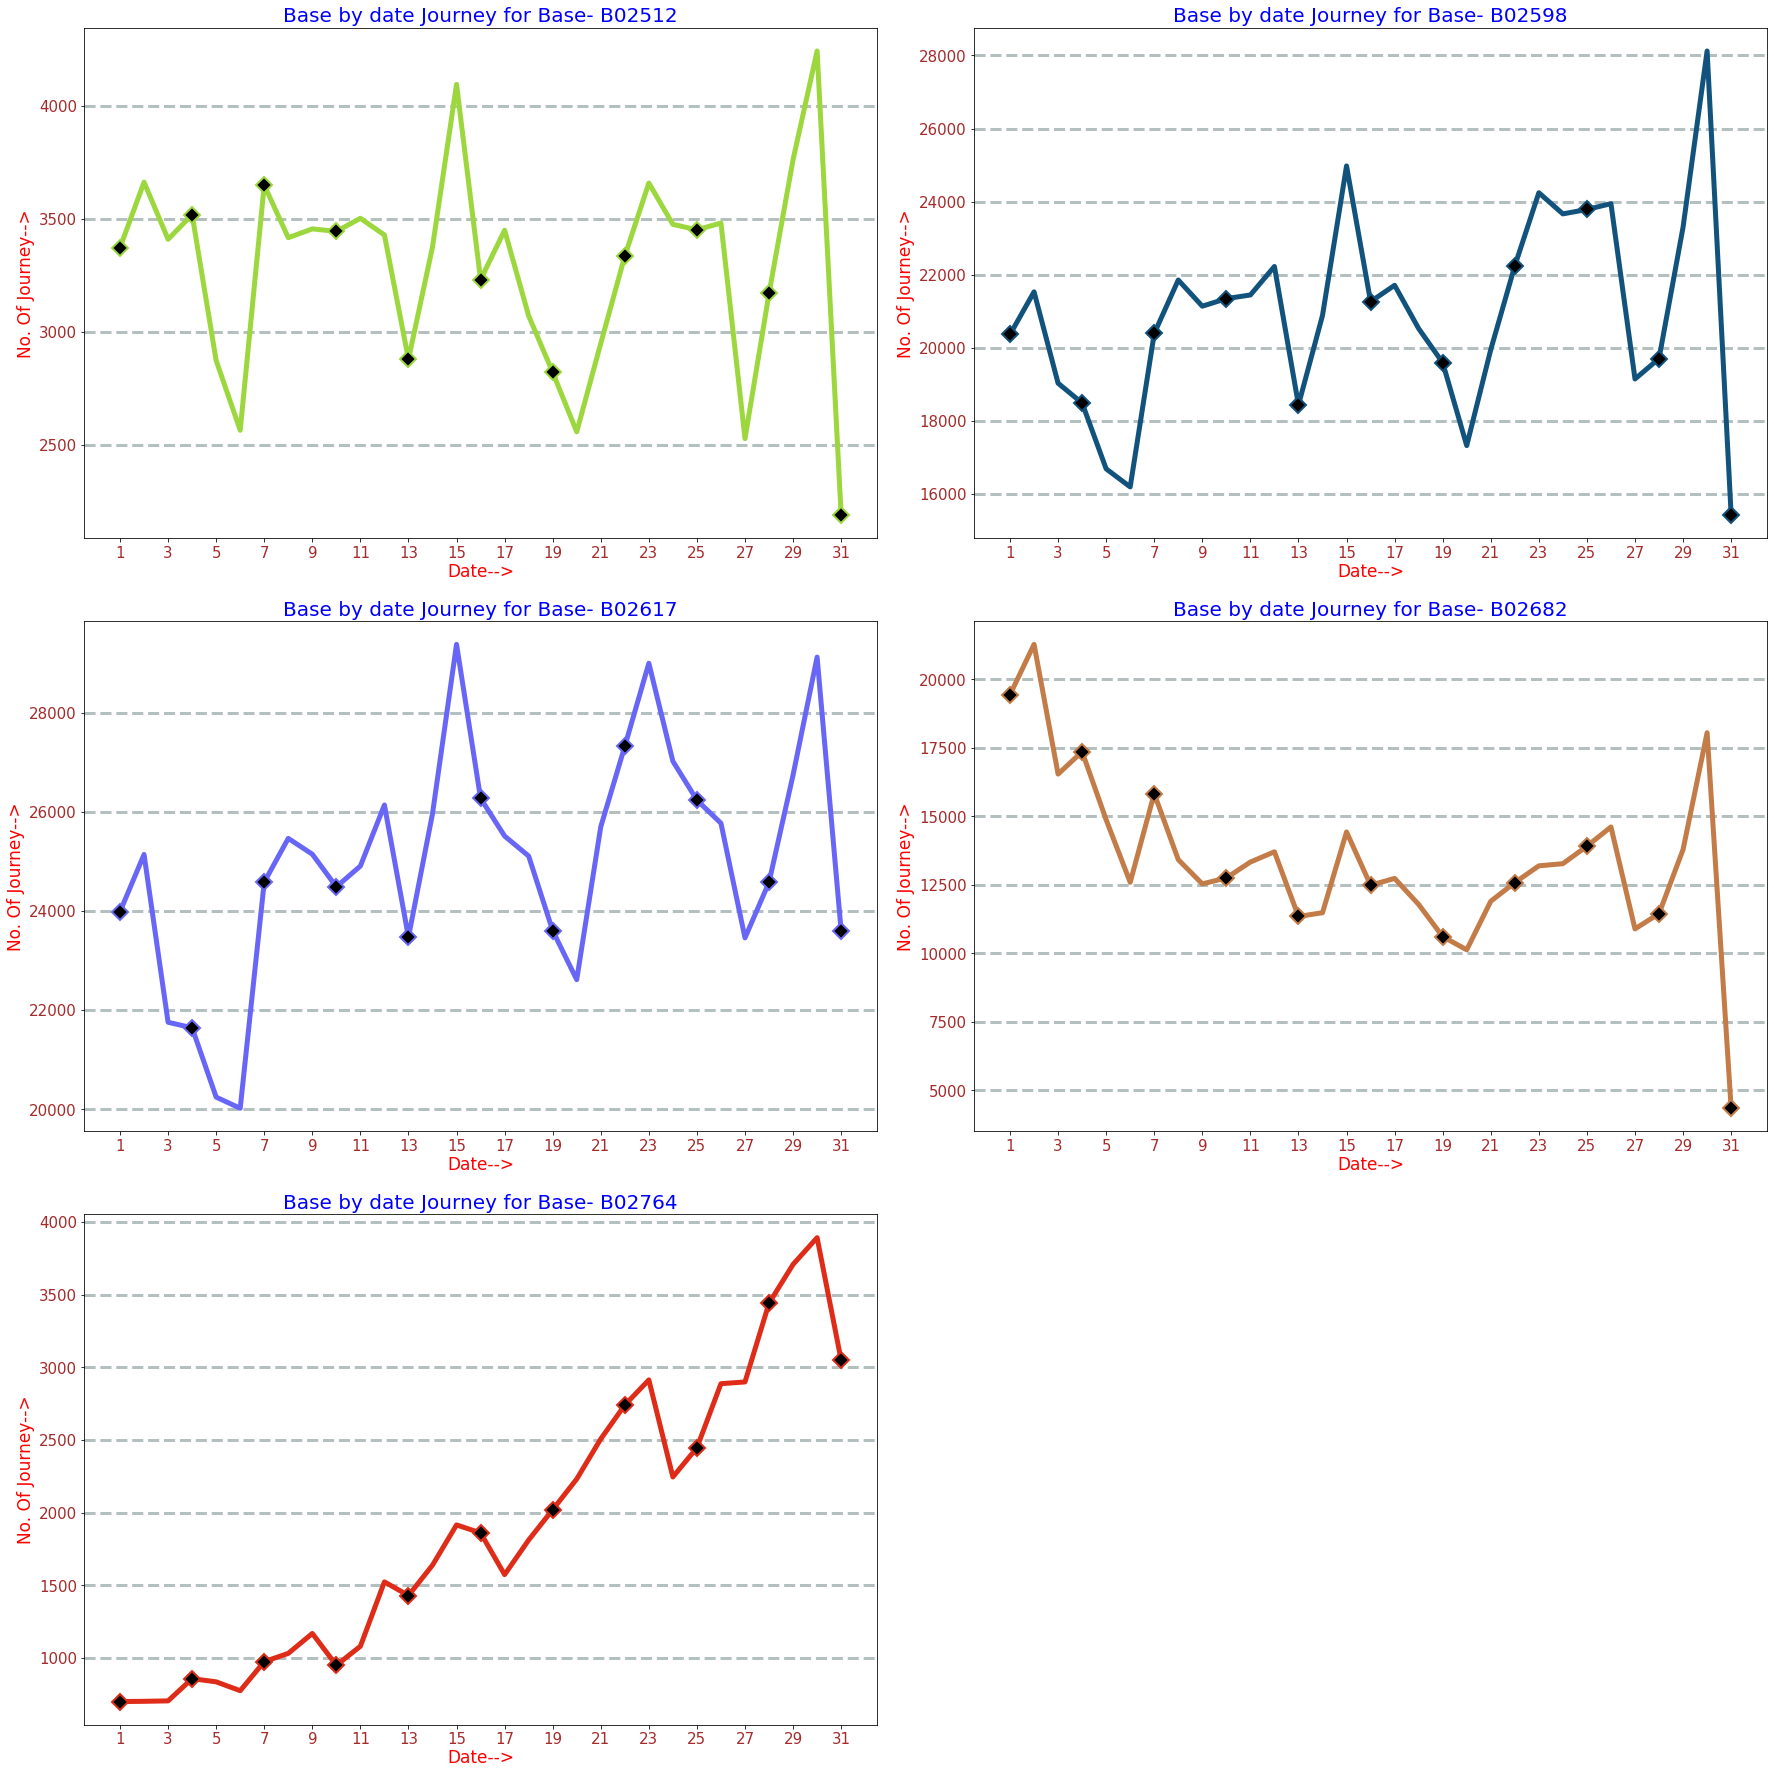

In [35]:
plt.figure(figsize=(25,25))
for i,Base1 in enumerate(df.Base.unique(),1):
    plt.subplot(3,2,i)
    d=df[df.Base==Base1]
    d.day.value_counts(sort=False).plot(kind="line",
            color=color_list_func(1),
            linewidth=5,
            marker='D',
            markerfacecolor='black',
            markeredgewidth=2,
            markersize=12,
            markevery=3
            
    )
    plt.title("Base by date Journey for Base- "+ Base1,fontsize=20,color="blue")
    plt.xlabel("Date-->",labelpad=2,fontsize="17",color="red")
    plt.ylabel("No. Of Journey-->",fontsize="17",color="red")
    plt.xticks([1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31],fontsize="15",color="brown")
    plt.yticks(fontsize="15",color="brown")
    plt.grid(color='#95a5a6', linestyle='--', linewidth=3, axis='y', alpha=0.7)
    plt.tight_layout(pad=2)
    plt.savefig("Journey contribution of all the Base by date.png")

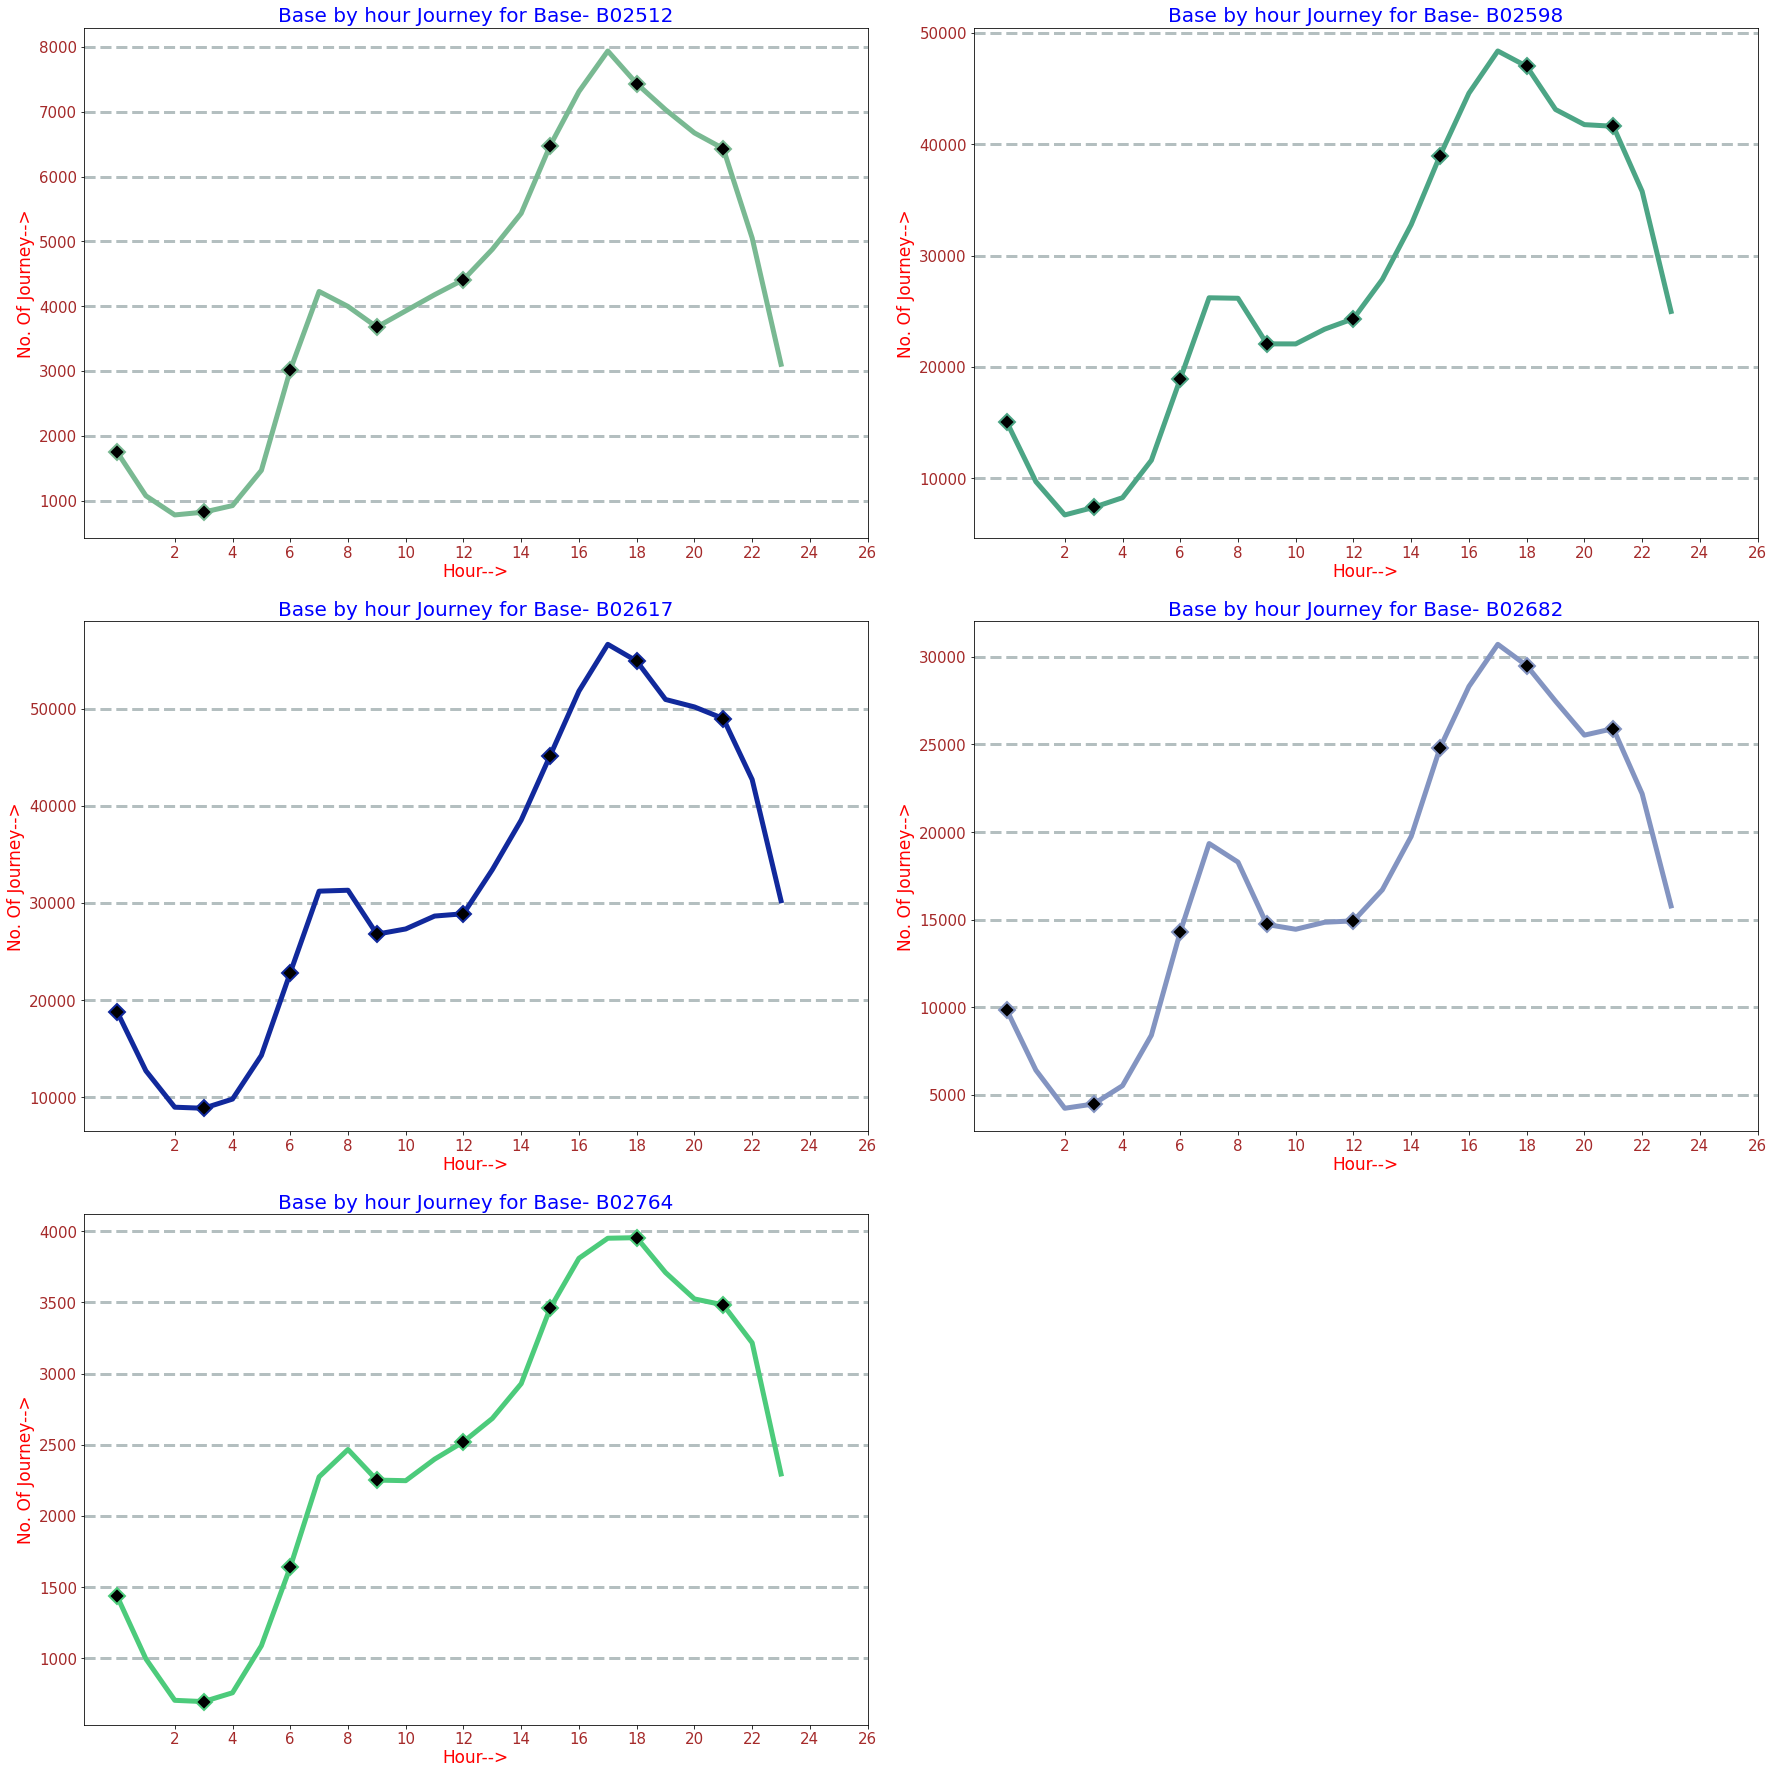

In [36]:
plt.figure(figsize=(25,25))
for i,Base1 in enumerate(df.Base.unique(),1):
    plt.subplot(3,2,i)
    d=df[df.Base==Base1]
    d.hour.value_counts(sort=False).plot(kind="line",
            color=color_list_func(1),
            linewidth=5,
            marker='D',
            markerfacecolor='black',
            markeredgewidth=2,
            markersize=12,
            markevery=3
            
    )
    plt.title("Base by hour Journey for Base- "+ Base1,fontsize=20,color="blue")
    plt.xlabel("Hour-->",labelpad=2,fontsize="17",color="red")
    plt.ylabel("No. Of Journey-->",fontsize="17",color="red")
    plt.xticks([2,4,6,8,10,12,14,16,18,20,22,24,26],fontsize="15",color="brown")
    plt.yticks(fontsize="15",color="brown")
    plt.grid(color='#95a5a6', linestyle='--', linewidth=3, axis='y', alpha=0.7)
    plt.tight_layout(pad=2)
    plt.savefig("Journey contribution of all the Base by hour.png")
 

In [53]:
df.head(5)

,Date_Time,Lat,Lon,Base,weekday,month,month_name,year,minute,hour,day
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,4,April,2014,11,0,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,4,April,2014,17,0,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,4,April,2014,21,0,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,4,April,2014,28,0,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,4,April,2014,33,0,1


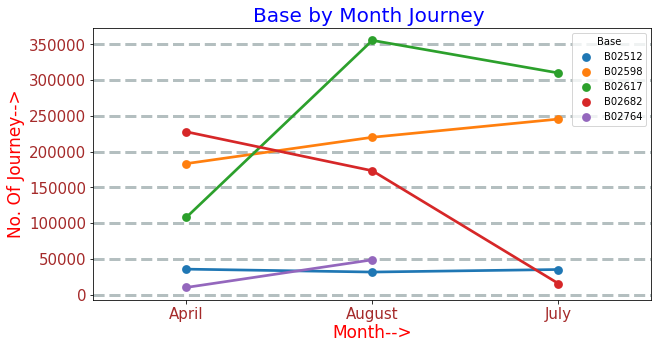

In [37]:
df_base_mh=df.groupby(["Base","month_name"])["Date_Time"].count().reset_index()
plt.figure(figsize=(10,5))
sns.pointplot(data=df_base_mh,x="month_name",y="Date_Time",hue="Base")
plt.title("Base by Month Journey ",fontsize=20,color="blue")
plt.xlabel("Month-->",labelpad=2,fontsize="17",color="red")
plt.ylabel("No. Of Journey-->",fontsize="17",color="red")
plt.xticks(fontsize="15",color="brown")
plt.yticks(fontsize="15",color="brown")
plt.grid(color='#95a5a6', linestyle='--', linewidth=3, axis='y', alpha=0.7)
plt.savefig("Journey contribution of all the Base by month linee.png")

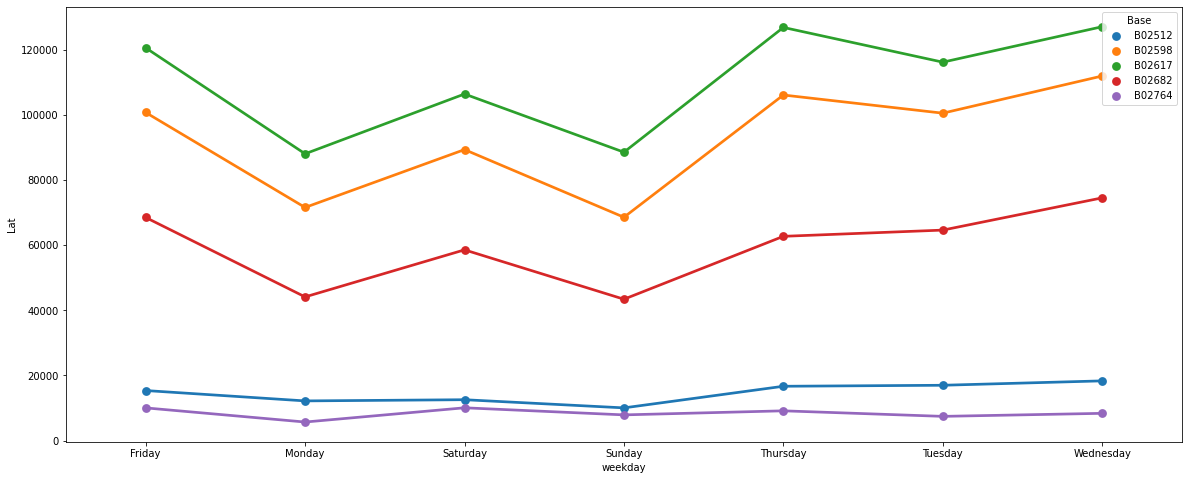

<Figure size 432x288 with 0 Axes>

In [38]:
df_base_lat=df.groupby(["Base","weekday"])["Lat"].count().reset_index()
plt.figure(figsize=(20,8))
sns.pointplot(data=df_base_lat,x="weekday",y="Lat",hue="Base")
plt.show()
plt.savefig("Journey contribution of all the Base by base line.png")

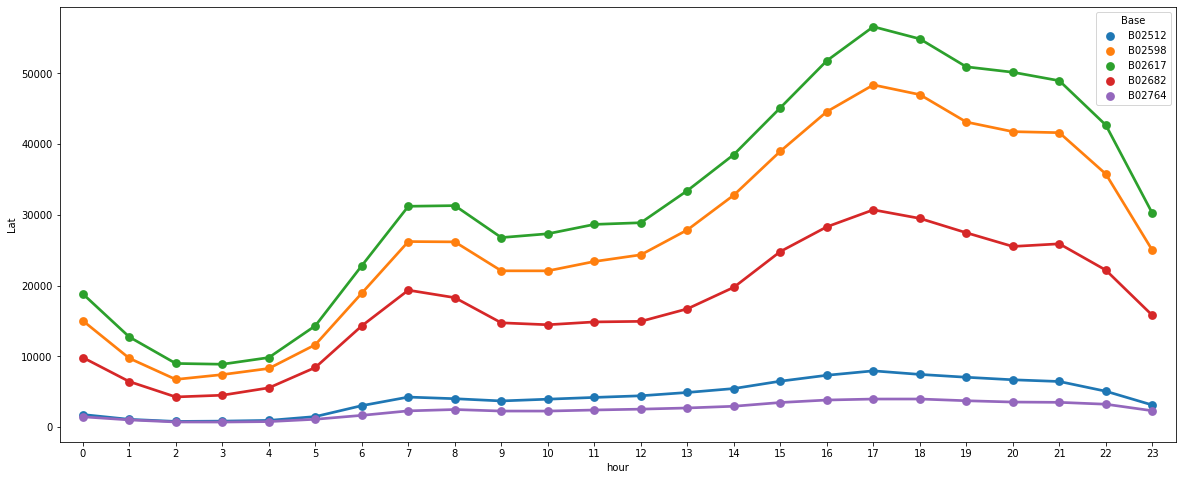

<Figure size 432x288 with 0 Axes>

In [39]:
df_base_lat=df.groupby(["Base","hour"])["Lat"].count().reset_index()
plt.figure(figsize=(20,8))
sns.pointplot(data=df_base_lat,x="hour",y="Lat",hue="Base")
plt.show()
plt.savefig("Journey contribution of all the Base by hour.png")

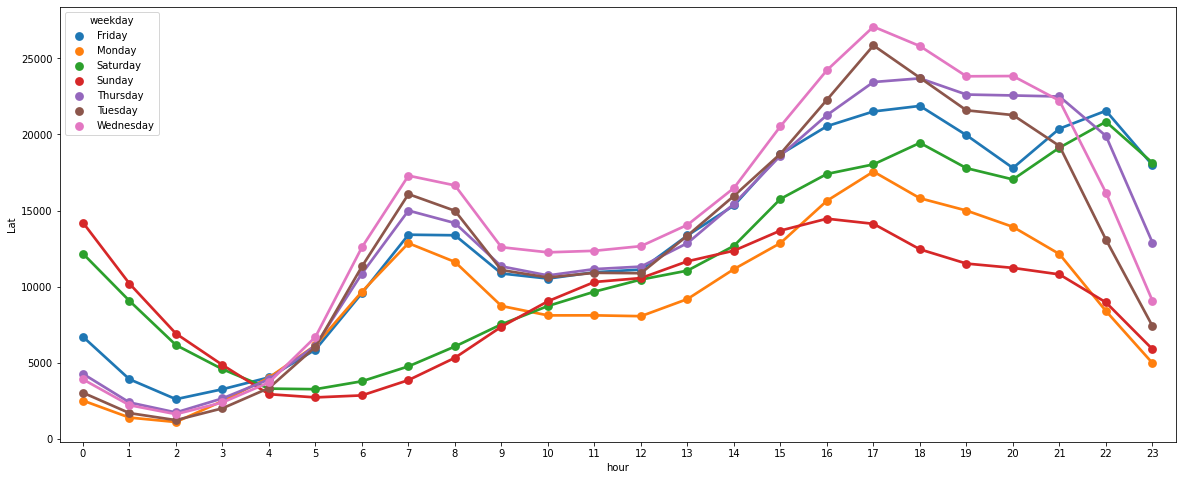

<Figure size 432x288 with 0 Axes>

In [40]:
df_weekday_lat=df.groupby(["weekday","hour"])["Lat"].count().reset_index()
plt.figure(figsize=(20,8))
sns.pointplot(data=df_weekday_lat,x="hour",y="Lat",hue="weekday")
plt.show()
plt.savefig("Journey contribution of all the weekday by hour.png")

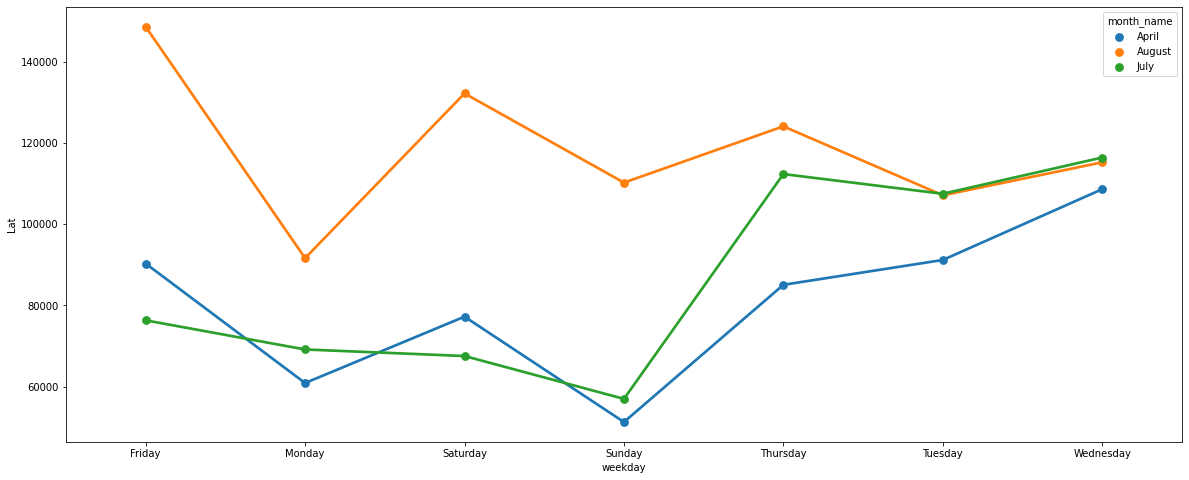

<Figure size 432x288 with 0 Axes>

In [41]:
df_month_lat=df.groupby(["month_name","weekday"])["Lat"].count().reset_index()
plt.figure(figsize=(20,8))
sns.pointplot(data=df_month_lat,x="weekday",y="Lat",hue="month_name")
plt.show()
plt.savefig("Journey contribution of all the month by weekday.png")

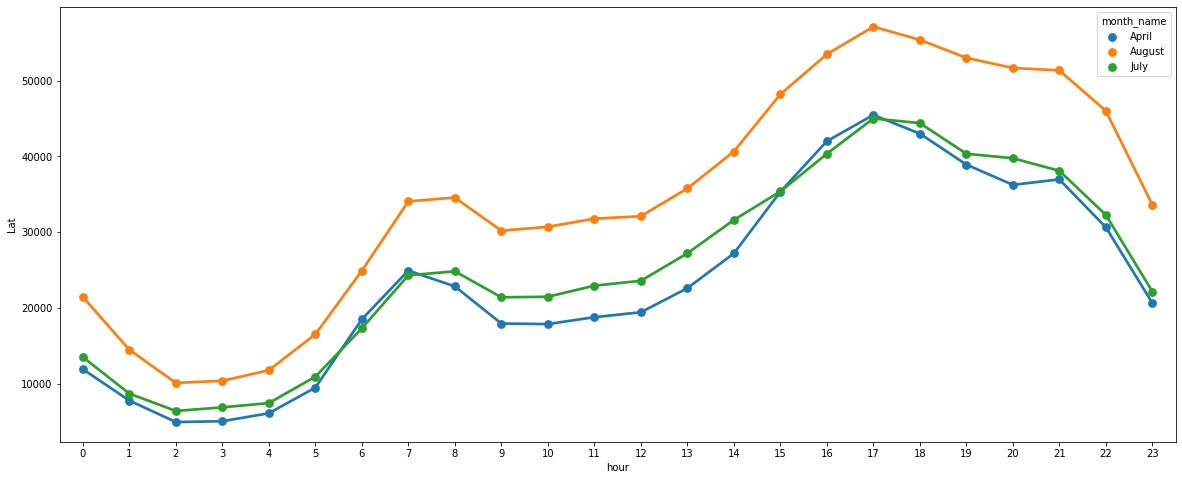

<Figure size 432x288 with 0 Axes>

In [42]:
df_month_lat=df.groupby(["month_name","hour"])["Lat"].count().reset_index()
plt.figure(figsize=(20,8))
sns.pointplot(data=df_month_lat,x="hour",y="Lat",hue="month_name")
plt.show()
plt.savefig("Journey contribution of all the month name by hour.png")

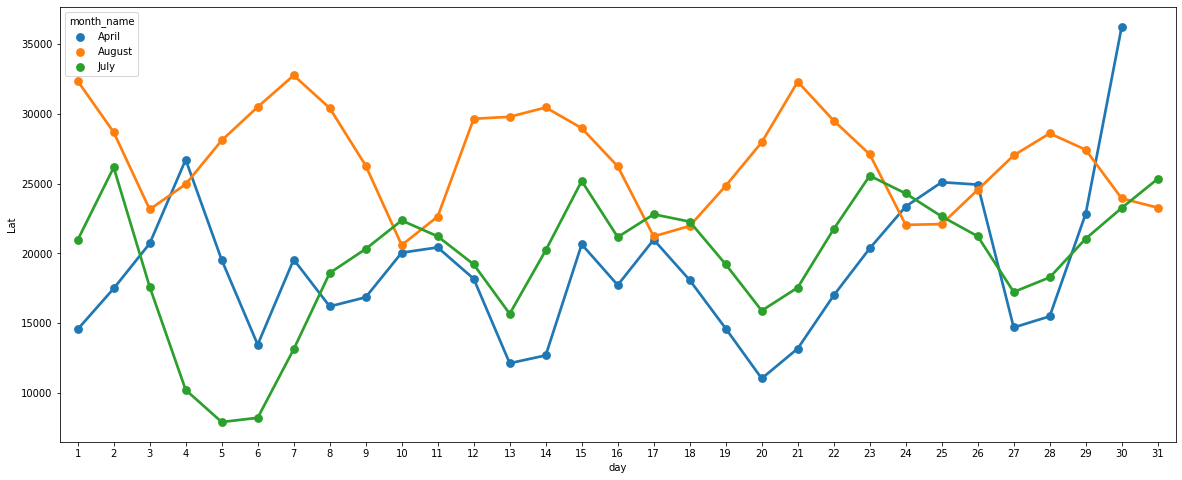

<Figure size 432x288 with 0 Axes>

In [43]:
df_month_lat=df.groupby(["month_name","day"])["Lat"].count().reset_index()
plt.figure(figsize=(20,8))
sns.pointplot(data=df_month_lat,x="day",y="Lat",hue="month_name")
plt.show()
plt.savefig("Journey contribution of all the month by day.png")

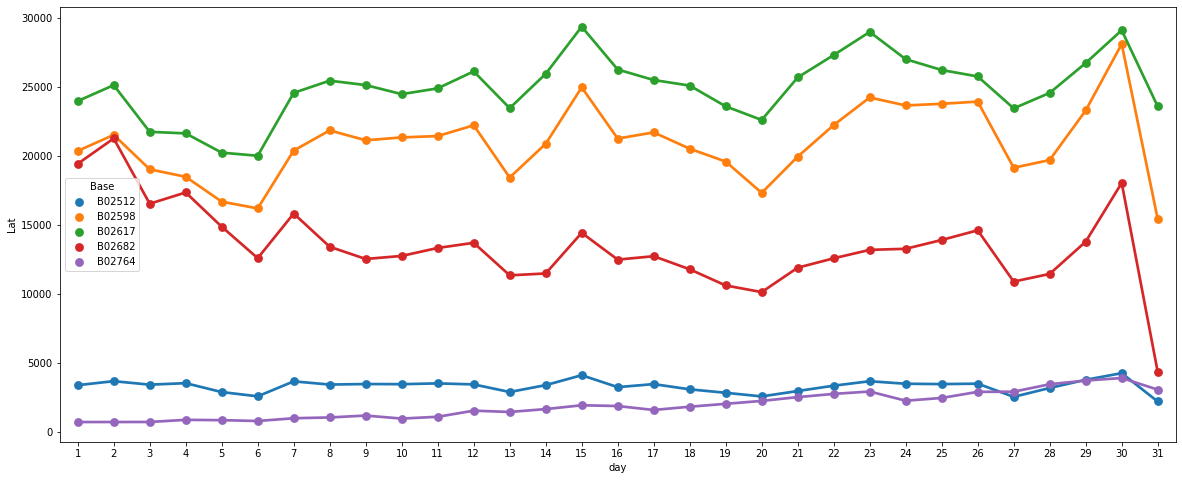

In [69]:
df_month_lat=df.groupby(["Base","day"])["Lat"].count().reset_index()
plt.figure(figsize=(20,8))
sns.pointplot(data=df_month_lat,x="day",y="Lat",hue="Base")
plt.show()